**Total five csv file are going to be used in this notebook:**

    1) books.csv
    2) ratings.csv
    3) tags.csv
    4) to_read.csv
    5) book_tags.csv

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# For better visuals of Dataframes in Jupyter Notebook

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

**Loading books.csv file here**

In [5]:
df_books = pd.read_csv('books.csv')

In [6]:
df_books.head(3)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...


**Before analysing the data , there are few basic details we should always learn abouth the data. I am going to use few commands here to get the basic details.**

In [7]:
df_books.shape    

# There are 10000 rows and 23 columns

(10000, 23)

In [8]:
df_books.authors.nunique()  

# There are only 4664 unique authors out of 10000 entries

4664

In [9]:
df_books.authors.value_counts()  

# Frequency of book written by individual author

Stephen King                                                                               60
Nora Roberts                                                                               59
Dean Koontz                                                                                47
Terry Pratchett                                                                            42
Agatha Christie                                                                            39
                                                                                           ..
Spencer Johnson, Kenneth H. Blanchard                                                       1
Margery Williams Bianco, William   Nicholson                                                1
Mark Waid, Alfred Gough, Miles Millar, Dave McCaig, Gerry Alanguilan, Leinil Francis Yu     1
Sarah Pinborough                                                                            1
Vikas Swarup                                                

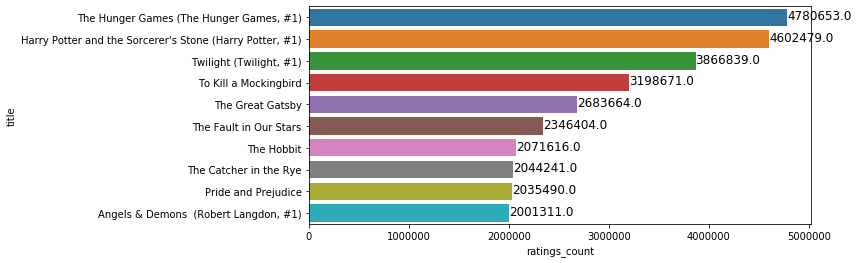

In [10]:
# Let's look at the top 10 rated books
top10Books = df_books.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
plot_dims = (9, 4)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(top10Books, top10Books.index)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 12, color = 'k')
    
plt.show()

In [12]:
df_books[['book_id', 'authors', 'title', 'average_rating', 'ratings_count']] \
     .sort_values('average_rating', ascending = False).head(20)

,book_id,authors,title,average_rating,ratings_count
3627,3628,Bill Watterson,The Complete Calvin and Hobbes,4.82,28900
3274,3275,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.77,33220
861,862,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",4.77,73572
8853,8854,Francine Rivers,Mark of the Lion Trilogy,4.76,9081
7946,7947,"Anonymous, Lane T. Dennis, Wayne A. Grudem",ESV Study Bible,4.76,8953
4482,4483,Bill Watterson,It's a Magical World: A Calvin and Hobbes Coll...,4.75,22351
6360,6361,Bill Watterson,There's Treasure Everywhere: A Calvin and Hobb...,4.74,16766
421,422,J.K. Rowling,"Harry Potter Boxset (Harry Potter, #1-7)",4.74,190050
3752,3753,J.K. Rowling,"Harry Potter Collection (Harry Potter, #1-6)",4.73,24618
6919,6920,Bill Watterson,The Indispensable Calvin and Hobbes,4.73,14597


In [13]:
print(df_books.original_publication_year.max())
print(df_books.original_publication_year.min())

# Here, min() shows a wrong entry in 'original_publication_year' as it is negative


2017.0
-1750.0


In [14]:
# 31 entries shows a negative year
df_books.original_publication_year[df_books.original_publication_year<=0].count()

31

In [15]:
df_books.original_publication_year.isna().sum() # Total 21  empty places in 'original_publication_year' column

21

In [16]:
# From above two cells, we can say there are 52 (31+21) wrong entries in 'original_publication_year'

In [17]:
df_books.original_publication_year.count() 

# just to cross check above output. Count() shows that there are 9979 
# entries with non numeric data 


9979

In [18]:
#This is a method to clip those rows where value is lower than 0 . It is not required here.

#df_books.original_publication_year = df_books.original_publication_year.clip(lower=0) 

In [19]:
(df_books.original_publication_year<0).value_counts()

False    9969
True       31
Name: original_publication_year, dtype: int64

**It seems that 'goodreads_book_id' and 'best_book_id' column are same. Lets check it.**

In [20]:
g = df_books['goodreads_book_id'] - df_books['best_book_id']

count_diff = 0

for k in g:
    if k!=0:
        count_diff = count_diff +1

print(count_diff)
    
# Output of this for loop says that there are 241 places where entries are not matching. 
# As of now I am dropping this 'best_book_id' column. 


241


In [21]:
df_books.language_code.value_counts().sum()  

# Result shows that there are 1184 empty cells in 'language_code' column

8916

In [22]:
l1 = df_books.language_code.describe()  
print(l1)

# Result shows that 10000 books are written in 25 different types of langauges
# Maximum books are written in english. In percentage it is 71.11 %


count     8916
unique      25
top        eng
freq      6341
Name: language_code, dtype: object


In [23]:
l2 = df_books.language_code.value_counts()    
print(l2)

# Here we can see that there are various variations in english language . 

eng      6341
en-US    2070
en-GB     257
ara        64
en-CA      58
fre        25
ind        21
spa        20
ger        13
per         7
jpn         7
pol         6
por         6
en          4
dan         3
nor         3
ita         2
fil         2
swe         1
rum         1
rus         1
mul         1
vie         1
tur         1
nl          1
Name: language_code, dtype: int64


In [24]:
# to get the total number of books written in english , we can use regex as follows:

(df_books.language_code.str.count(r'(^en.*)')==1).value_counts()

True     8730
False    1270
Name: language_code, dtype: int64

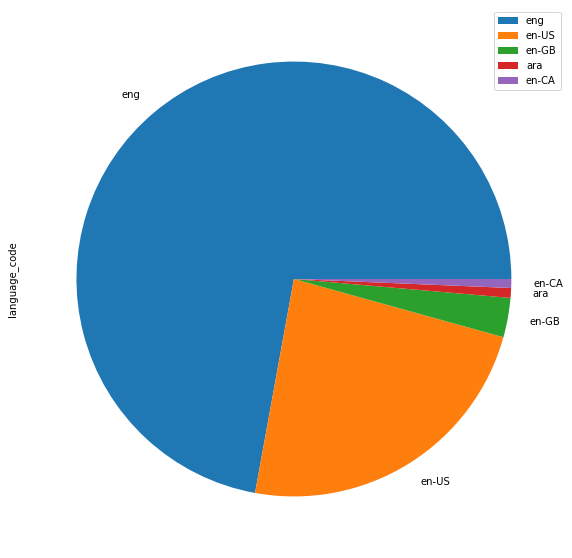

In [25]:
l2.head().plot(kind = 'pie', figsize=(10,10)).legend()
plt.show()

Result shows that total 8730 books are written in english language out of 8916  which is approx 98% of the total available books. 

In [26]:
df_ratings = pd.read_csv('ratings.csv')

In [27]:
df_ratings[df_ratings['book_id']==123]['rating'].value_counts()

4    2377
3    1776
5    1586
2     330
1      66
Name: rating, dtype: int64

In [28]:
df_books[df_books['book_id']==123]


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
122,123,5358,5358,38270,11,582418275,9.780582e+12,John Grisham,1991.0,The Firm,...,488269,488355,3139,5075,20119,111543,190966,160652,https://images.gr-assets.com/books/1418465200m...,https://images.gr-assets.com/books/1418465200s...


We can see that there is some difference in rating factor given in df_books and df_ratings. There are many extra entries for rating in df_books.These entries are from non - registered users. we will drop these column and use those rating which are given in df_ratings only.

In [29]:
df_ratings.groupby('book_id')['rating'].count().sort_values(ascending=False)

book_id
1       22806
2       21850
4       19088
3       16931
5       16604
        ...  
9315       36
1935       33
9486       24
9345       11
7803        8
Name: rating, Length: 10000, dtype: int64

In [30]:
# List of book ids of Top-10 books

df_user_rating = df_ratings.groupby('book_id')['rating'].count().sort_values(ascending=False)
df_top_10_books=df_user_rating[0:10]
z = list(df_top_10_books.index)
z

[1, 2, 4, 3, 5, 17, 20, 18, 23, 7]

In [31]:
# Title of the top rated books

df_books[df_books['book_id'].isin(z)]['title']


0               The Hunger Games (The Hunger Games, #1)
1     Harry Potter and the Sorcerer's Stone (Harry P...
2                               Twilight (Twilight, #1)
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
6                                            The Hobbit
16                 Catching Fire (The Hunger Games, #2)
17    Harry Potter and the Prisoner of Azkaban (Harr...
19                    Mockingjay (The Hunger Games, #3)
22    Harry Potter and the Chamber of Secrets (Harry...
Name: title, dtype: object

## Analysis of df_books DataFrame(24 columns) :
    1) 'book_id' : This column is present in df_rating also. We need to merge these both dataframes to get the result
    2) 'goodreads_book_id' : These are unique book ids which can be mapped with df_book_tag
    3) 'best_book_id','work_id','books_count','isbn','isbn13': All these columns are of no use in further analysis and can         be dropped. 
    4) 'authors' ,'title' these column will be useful for further analysis.
    5) 'Original_title','small_image_url' these columns can be dropped. 
    6)  There are total six columns related to rating on the scale of 1-5 and then average rating. But this data is not
        mapped with ratings given in ratings.csv file. so dicsrding these columns. 


**Lets load the 'ratings.csv' file and explore it**

In [32]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [33]:
df_ratings.describe()

,user_id,book_id,rating
count,5.976479e+06,5.976479e+06,5.976479e+06
mean,2.622446e+04,2.006477e+03,3.919866e+00
std,1.541323e+04,2.468499e+03,9.910868e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.281300e+04,1.980000e+02,3.000000e+00
50%,2.593800e+04,8.850000e+02,4.000000e+00
75%,3.950900e+04,2.973000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


In [34]:
df_ratings.shape

(5976479, 3)

In [37]:
df_ratings.columns

Index(['user_id', 'book_id', 'rating'], dtype='object')

In [38]:
# How many unique users are rating the books ? 
# Out of 5976479 users entries, only 53424 are unique

df_ratings.user_id.nunique()

53424

In [39]:
df_ratings.user_id.count()

5976479

In [41]:
df_ratings.book_id.nunique()

10000

In [42]:
df_ratings.book_id.count()

5976479

We can use aggregate function to get the data which we have calculated in above 4 cells. 

In [43]:
df_ratings.agg(['count','nunique'])

,user_id,book_id,rating
count,5976479,5976479,5976479
nunique,53424,10000,5


In [44]:
# Check if any null value in columns

df_ratings.user_id.isnull().sum()

0

In [45]:
df_ratings.book_id.isnull().sum()

0

In [46]:
df_ratings.rating.isnull().sum()

0

**So as per the gathered information we can say that there are total 10000 different books, rated by 53424 unique users with total 5976479 ratings.**

In [ ]:
plt.hist(df_ratings.rating)

plt.xlabel('Types of Ratings[0-5]')
plt.ylabel('Number of Ratings given by the users')
plt.title('Relation between Rating and its frequency')
plt.grid()

plt.savefig("Rating vs Freq.png")
plt.show()


In [ ]:
## Why this following line gives a different idea about the data
#plt.hist(df_ratings['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],rwidth=0.5);

**Above graph shows that maximum ratings are between 3 to 5 and more than 2 million users rated around 4 . Lets check for the specific numbers.**

In [ ]:
df_ratings[(df_ratings.rating>=4)&(df_ratings.rating<=5)].count()[0]

# Number of ratings between 4 and 5. 
# It is approx 70% of the total rating.

Lets check how many times a single user gave rating.

In [ ]:
df_user_rating = df_ratings.groupby('user_id')['rating']


In [ ]:
%%time 

df_user_rating.describe()

**We should pay attention here, The above query took almost 3 minutes . Lets try some ways to reduce the time and make it more efficient**

In [ ]:
df_user_rating = df_ratings.groupby('user_id')['rating'].count().sort_values()


In [ ]:
%%time 
df_user_rating.describe()

This above query is more useful as it is giving us all over information about rating and user.

In [ ]:
plt.hist(df_user_rating,color = 'skyblue')  # plt.hist(df_user_rating,bins=5,color = 'skyblue')
                                            # Why bin=5 gives a different output?
plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.title('Number of rated book vs Users')
plt.grid()

plt.savefig("Number of rated book vs Users.png")
plt.show()

Now we will examine the book information. Lets start with How many times a book has been rated?

In [ ]:
series_book_rating = df_ratings.groupby('book_id')['rating'].count().sort_values(ascending=False)
series_book_rating.describe()

In [ ]:
series_book_rating.head()

In [ ]:
series_book_rating.tail()

In [ ]:
series_book_rating.index

In [ ]:
series_book_rating.sort_index().index

In [ ]:
x = list(series_book_rating.sort_index().index)


In [ ]:
series_book_rating.sort_index().head()

In [ ]:
y = list(series_book_rating.sort_index())

Here x represents a list of sorted index numbers which is (1-10000) and y represents number of ratings for specifc index number.In x and y, index number is book_id only. Now We can plot a graph between these two entities to find the relation .

In [ ]:

plt.scatter(x,y)
plt.title('Book vs Rating')
plt.xlabel('Book id ')
plt.ylabel('Ratings')

plt.grid(True)
plt.savefig('Book vs Rating.png');
plt.show()

In the above graph we can see that most of the entries are touching x-axis and y-axis . This state of graph is not suitable for further analysis. To improve the visibility, we can use log scale. 

In [ ]:
plt.scatter(x,y,s=1,alpha=.1)
plt.title('Book vs Rating')
plt.xlabel('Book id ')
plt.ylabel('Ratings')
plt.yscale('log')

plt.grid(True)
plt.savefig('Book vs Rating.png');
plt.show()

See the difference! only marker-size(s) and alpha(which makes graph opaque or transparent) added and log scale. Graph shows that maximum books are rated between 100 to 1000 times. We can a corelation between book_id and rating as well.

In [ ]:
(df_ratings.loc[df_ratings.book_id == 1,'rating']).count()  #exact number of ratings given to book_id = 1 

***Lets load the 'tags.csv' file and explore it***

In [ ]:
df_tags = pd.read_csv('tags.csv')
df_tags.info()

In [ ]:
df_tags.shape

In [ ]:
df_tags.head()

In [ ]:
df_tags.tail()

In [ ]:
df_tags.sample(5)

In [ ]:
# T0 check that all 

mask = pd.to_numeric(df_tags['tag_name'], errors='coerce').isna()
mask

In [ ]:
mask.sum() # Out of 34252 entries , there are 34134 entries with string format, others are some random number.
           # These numbers can not be a tag. so we will discard these values or replace with a dummy string.

## Analysis of df_tags DataFrame(2 columns) :
    1) This dataframe provides the tag id and title of the books
    2) There are total 34252 tags
    3) There are 34252 actual tag titles with string format, remaining titles are in numeric format. 
    4) These remaining titles can be replace with a common tag title but it will affect the results,
       so we can drop them.


**Lets load the 'book_tags.csv' file and explore it**

In [ ]:
df_book_tags = pd.read_csv('book_tags.csv')

In [ ]:
df_book_tags.sample(5)

In [ ]:
df_book_tags.info()

In [ ]:
df_book_tags.groupby('goodreads_book_id')['tag_id'].count().sort_values()

# Result shows that all books has 100 tags except three books. 

We can not simply discard 'count' column. Higher number in this column shows higher popularity , which can be used in modeling for recommendation system.

Now we will check most frequently used tags

In [ ]:
most_freq_tags = df_book_tags.groupby('tag_id')['count'].count().sort_values(ascending=False)

In [ ]:
plt.plot(list(most_freq_tags)) # We need to convert this into log sacle for better clearity

In [ ]:
plt.plot(list(most_freq_tags),color = 'g')
plt.yscale('log')
plt.xlabel('Tag_id')
plt.ylabel('count of tags')
plt.title('Frequency of tag ids')
plt.grid(True)
plt.show()


In [ ]:
# Total count of each tag used 
# We are generating top 5 most frequently used tags 

Sum_most_freq_tags = np.cumsum(most_freq_tags).sort_values(ascending = False)


In [ ]:
Sum_most_freq_tags.head()

In [ ]:
plt.plot(list(Sum_most_freq_tags),color = 'g')
plt.yscale('log')
plt.xlabel('Tag_id')
plt.ylabel('count of tags')
plt.title('Frequency of tag ids')
plt.grid(True)
plt.show()


In [ ]:
# Even after taking log-scale this graph is skewed and we are not getting much fruitful information.

In [ ]:
# Lets focus on chunks of tags id . lets say first 200 tag ids

sum_list = Sum_most_freq_tags[0:150]
sum_list

In [ ]:
plt.plot(list(sum_list),color = 'r')
plt.yscale('log')
plt.xlabel('Tag_id')
plt.ylabel('count of tags')
plt.title('Frequency of tag ids')
plt.grid(True)
plt.show()


In [ ]:
popular_tags=df_tags[df_tags['tag_id'].isin(list(most_freq_tags.index[:200]))]

In [ ]:
popular_tags.head(20)

Tags are going to play a crucial role in recommendation system . In the above query we have gathered top 200 most frequently used tags

## Analysis of df_book_tags DataFrame(3 columns) :
        
        1) Dataframe contains three columns : goodreads_book_id, tag_id, count
        2) Every book is mapped with multiple tags
        3) Top 200, most frequently used tags_id and Title fetched from the data 
        4) Its been observed that many tags are same but written in different ways. We can merge these tags together
        5) All books are tagged with 100 different tags except 3 books. 


Cleaning Process: 

**Clean:**

**Define**

**df_books:**

'best_book_id': Drop this column.
'work_id': Drop this column.
'books_count': Drop this column.
'isbn': Drop this column.
'isbn13': Drop this column.
'authors': *Keep first element (author), and drop the rest."
'original_title': Drop this column.
'language_code': *Change "en-US", "en-GB", "en-CA" to "eng".
'average_rating': Drop this column.
'ratings_count': Drop this column.
'work_ratings_count': Drop this column.
'work_text_reviews_count': Drop this column.
'ratings_1' to 'ratings_5: Drop these columns.
'small_image_url': Drop this column.

**df_book_tags:**

'count': Drop this column.


**df_book_tags and df_tags:**
Old tag_id to be changed to new_tag_id.
{1540 : 1 , 1542 : 1 , 1642 : 2 , 1659 : 2 , 1691 : 3 , 2104 : 4 , 2277 : 5 , 31656 : 5 , 4605 : 6 , 4949 : 7 , 4959 : 7 , 4985 : 7 , 5051 : 7 , 5751 : 8 , 6828 : 9 , 6857 : 9 , 6888 : 9 , 6895 : 9 , 6953 : 9 , 6960 : 9 , 7404 : 10 , 7457 : 10 , 7725 : 11 , 12680 : 11 , 15048 : 11 , 15067 : 11 , 7852 : 12 , 8055 : 13 , 8067 : 13 , 8076 : 13 , 20288 : 13 , 8517 : 14 , 8527 : 14 , 8533 : 14 , 9336 : 14 , 9886 : 15 , 10641 : 16 , 10644 : 16 , 11221 : 17 , 11305 : 18 , 31617 : 18 , 12600 : 19 , 14467 : 20 , 14487 : 20 , 14552 : 21 , 14821 : 22 , 16799 : 23 , 17124 : 23 , 17129 : 23 , 18318 : 24 , 18326 : 24 , 18367 : 24 , 18640 : 25 , 18886 : 26 , 20926 : 27 , 20939 : 27 , 20957 : 27 , 20989 : 27 , 20994 : 27 , 21689 : 28 , 21773 : 28 , 22973 : 29 , 29011 : 29 , 23471 : 30 , 25630 : 31 , 26138 : 32 , 14370 : 33 , 26735 : 33 , 11370 : 34 , 11376 : 34 , 26771 : 34 , 26785 : 34 , 26816 : 34 , 26837 : 34 , 26842 : 34 , 26894 : 34 , 26897 : 34 , 29076 : 35 , 29083 : 35 , 30358 : 35 , 30386 : 35 , 29452 : 36 , 32996 : 36 , 33009 : 36 , 33012 : 36 , 33114 : 36 , 33124 : 36 , 33165 : 36 , 32130 : 37 , 32686 : 38}


If tag is other than those listed, then tag_id=99.

new_tag_id tag name to be changed to new_tag_name:
{1 : action , 2 : adult , 3 : adventure , 4 : all-time-favorites , 5 : american , 6 : biography , 7 : bookclub , 8 : british , 9 : children , 10 : classics , 11 : comedy , 12 : coming-of-age , 13 : contemporary , 14 : crime , 15 : drama , 16 : english , 17 : family , 18 : fantasy , 19 : friendship , 20 : historical , 21 : history , 22 : horror , 23 : kids , 24 : literature , 25 : love , 26 : magic , 27 : mystery , 28 : non-fiction , 29 : paranormal , 30 : philosophy , 31 : relationships , 32 : romance , 33 : school , 34 : sci-fi , 35 : suspense , 36 : teen , 37 : war , 38 : women , 99 : z_other }

**df_book_tags and df_tags:**

Merge these 2 dataframes.

Drop duplicate rows where the same tag appears more than once per book.

Drop rows with tag_id = 99 (other)



In [ ]:
df_books.head(1)


In [ ]:
df_books.columns


In [ ]:
# df_books cleaning:

# Drop columns that will not be useful for book recommendations:
df_books=df_books.drop(labels=['best_book_id','work_id','books_count','isbn','isbn13','original_title',
                               'average_rating','ratings_count','work_ratings_count','work_text_reviews_count',
                               'ratings_1','ratings_2','ratings_3','ratings_4','ratings_5','small_image_url'],axis=1)

In [ ]:
# df_books cleaning:

# Standardise language code for english:
df_books['language_code'].replace({'en-US':'eng','en-GB':'eng','en-CA':'eng'}, inplace=True)

In [ ]:
# df_books cleaning:

# Drop secondary names under authors.
df_books['authors']=df_books['authors'].str.split(',',expand=True)[0]

In [ ]:
# df_book_tags cleaning:

# Drop columns that will not be useful for book recommendations:
df_book_tags=df_book_tags.drop(labels=['count'],axis=1)

In [ ]:
# df_book_tags and df_tags:

new_tag_id_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,\
                 21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]

new_tag_name_dic={1:'action', 2:'adult', 3:'adventure', 4:'all-time-favorites', 5:'american', 6:'biography', 
                  7:'bookclub', 8:'british', 9:'children', 10:'classics', 11:'comedy', 12:'coming-of-age', 
                  13:'contemporary', 14:'crime', 15:'drama', 16:'english', 17:'family', 18:'fantasy', 
                  19:'friendship', 20:'historical', 21:'history', 22:'horror', 23:'kids', 24:'literature', 25:'love', 
                  26:'magic', 27:'mystery', 28:'non-fiction', 29:'paranormal', 30:'philosophy', 31:'relationships', 
                  32:'romance', 33:'school', 34:'sci-fi', 35:'suspense', 36:'teen', 37:'war', 38:'women', 99:'z_other'}

new_tag_id_dic={1540:1, 1542:1, 1642:2, 1659:2, 1691:3, 2104:4, 2277:5, 31656:5, 4605:6, 4949:7, 4959:7, 4985:7, 
                5051:7, 5751:8, 6828:9, 6857:9, 6888:9, 6895:9, 6953:9, 6960:9, 7404:10, 7457:10, 7725:11, 12680:11, 
                15048:11, 15067:11, 7852:12, 8055:13, 8067:13, 8076:13, 20288:13, 8517:14, 8527:14, 8533:14, 9336:14, 
                9886:15, 10641:16, 10644:16, 11221:17, 11305:18, 31617:18, 12600:19, 14467:20, 14487:20, 14552:21, 
                14821:22, 16799:23, 17124:23, 17129:23, 18318:24, 18326:24, 18367:24, 18640:25, 18886:26, 20926:27, 
                20939:27, 20957:27, 20989:27,  20994:27, 21689:28, 21773:28, 22973:29, 29011:29, 23471:30, 25630:31, 
                26138:32, 14370:33, 26735:33, 11370:34, 11376:34, 26771:34, 26785:34, 26816:34, 26837:34, 26842:34, 
                26894:34, 26897:34, 29076:35, 29083:35, 30358:35, 30386:35, 29452:36, 32996:36, 33009:36, 33012:36, 
                33114:36, 33124:36, 33165:36, 32130:37, 32686:38}

df_book_tags['new_tag_id']=df_book_tags['tag_id'].replace(new_tag_id_dic)

#If tag is other than those listed, then tag_id=99. 
df_book_tags.loc[~df_book_tags['new_tag_id'].isin(new_tag_id_list), 'new_tag_id']=99

#create a column for tag ids:
df_tags['new_tag_id']=df_tags['tag_id'].replace(new_tag_id_dic)  

#create a column for tag ids. This will be replaced by dictionary values with the tag name.
df_book_tags['new_tag_name']=df_book_tags['new_tag_id']
df_book_tags=df_book_tags.replace({'new_tag_name': new_tag_name_dic})

#drop tags that are duplicated across a same book_id
df_book_tags = df_book_tags.sort_values('goodreads_book_id', ascending=True) #sort according to book_id

#drop the duplicate tag_ids when duplicated within a book.
df_book_tags = df_book_tags.drop_duplicates(subset=['new_tag_id','goodreads_book_id'], keep='first')

#drop the rows containing 99 (eg. other) as all books have been tagged at least once as other. This tag does not
#provide additional information
df_book_tags = df_book_tags[df_book_tags['new_tag_id'] != 99] 

#drop old tag_id column.
df_book_tags = df_book_tags.drop('tag_id', 1)

#rename the columns to be consistent with the other dataframes.
df_book_tags = df_book_tags.rename(columns={'new_tag_id':'tag_id','new_tag_name': 'tag_name','goodreads_book_id':'book_id'})

tag_count=df_book_tags.groupby('tag_name')['book_id'].count().sort_values(ascending=False)

In [ ]:
df_book_tags.head()


### Data after Cleaning

In [ ]:
df_books.head()


In [ ]:
df_books.shape


In [ ]:
df_ratings.head()


In [ ]:
df_ratings.shape


In [ ]:
df_book_tags.head()


In [ ]:
df_book_tags.shape


In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=list(tag_count.index), y=tag_count,order=list(tag_count.index),color="c")
plt.xticks(rotation=90)

plt.savefig('genres.png');

In [ ]:
tag_count[1:]


In [ ]:
plt.hist(tag_count)


In [ ]:
df_tags.head()


In [ ]:
df_ratings.shape


In [ ]:
df_ratings.head()


In [ ]:
#Save Clean datasets into csv files
df_books.to_csv(r'df_books.csv',index=False)
df_ratings.to_csv(r'df_ratings.csv',index=False)
df_book_tags.to_csv(r'df_tags.csv',index=False)